In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pricing_environment import Two_items_PricingEnvironment
from pricing_agent import GPUCB

In [2]:
n_cust=100

f1=lambda x,y,noise=0.1: np.clip(1-0.2*(3*x**2+y**3)+noise*np.random.normal(0,noise),0,1)
f2=lambda x,y,noise=0.1: np.clip(1-0.5*(0.5*np.cos(x)+2*np.sin(y))+noise*np.random.normal(0,noise),0,1)
f=lambda x,y,c1,c2,noise=0.1: f1(x,y,noise)*(x-c1)+f2(x,y,noise)*(y-c2)

x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
X,Y=np.meshgrid(x,y)

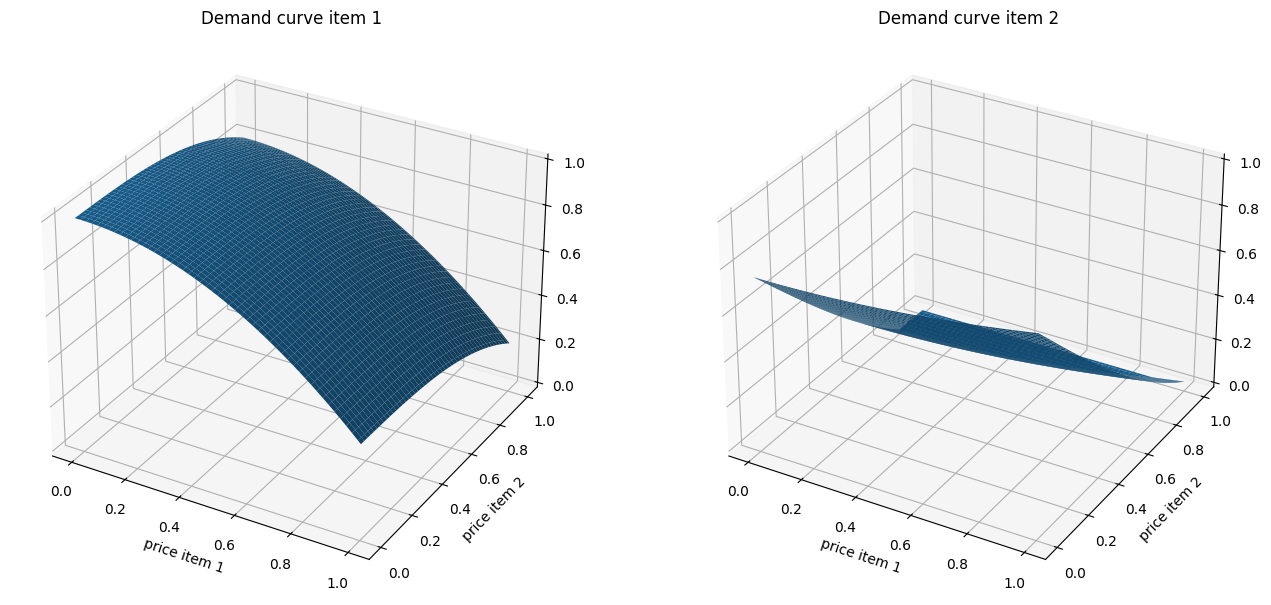

In [3]:
dem1=f1(X,Y,noise=0)
fig=plt.figure(figsize=(16,9))
ax=fig.add_subplot(121,projection='3d')
ax.plot_surface(X,Y,dem1)
ax.set_xlabel('price item 1')
ax.set_ylabel('price item 2')
ax.set_title('Demand curve item 1')
ax.set_zlim(zmin=0,zmax=1)

dem2=f2(X,Y,noise=0)
ax=fig.add_subplot(122,projection='3d')
ax.plot_surface(X,Y,dem2)
ax.set_xlabel('price item 1')
ax.set_ylabel('price item 2')
ax.set_title('Demand curve item 2')
ax.set_zlim(zmin=0,zmax=1)


plt.show()

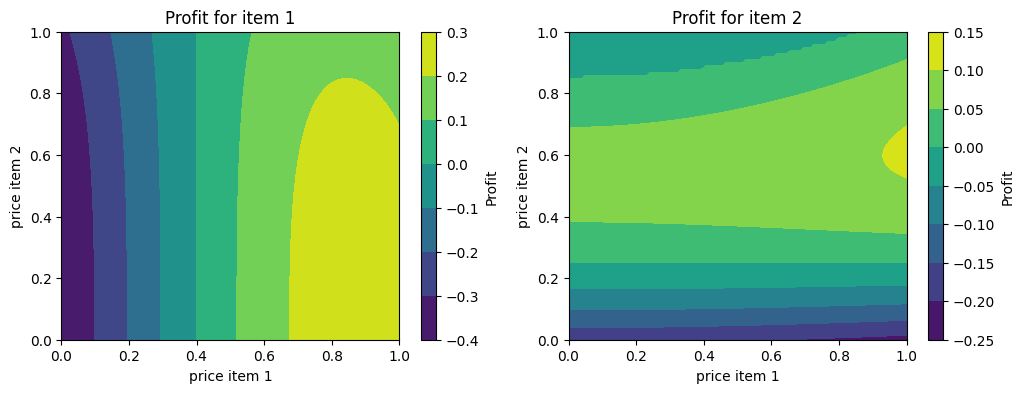

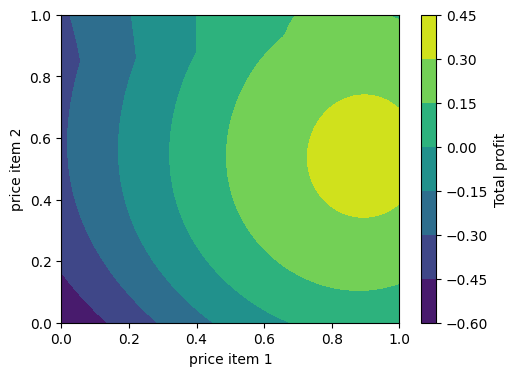

In [4]:
c1=0.4
c2=0.25

fig=plt.figure(figsize=(12,4))

profit_i1=f1(X,Y,noise=0)*(X-c1)
ax=fig.add_subplot(121)
ax.set_title('Profit for item 1')
cp=ax.contourf(X,Y,profit_i1)
plt.colorbar(cp,label='Profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')

profit_i2=f2(X,Y,noise=0)*(Y-c2)
ax=fig.add_subplot(122)
ax.set_title('Profit for item 2')
cp=ax.contourf(X,Y,profit_i2)
plt.colorbar(cp,label='Profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')

fig=plt.figure(figsize=(12,4))
tot_profit=f(X,Y,c1,c2,0)
ax=fig.add_subplot(121)
cp=ax.contourf(X,Y,tot_profit)
plt.colorbar(cp,label='Total profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')
plt.show()

In [5]:
args=np.unravel_index(np.argmax(tot_profit),tot_profit.shape)
best_p1=x[args[1]]
best_p2=x[args[0]]
print(f'Best price p1: {best_p1.round(2)},best price p2: {best_p2.round(2)}\nBest profit: {f(best_p1,best_p2,c1,c2,0).round(2)}')

Best price p1: 0.9,best price p2: 0.54
Best profit: 0.34


In [6]:
env=Two_items_PricingEnvironment(f1,f2,c1,c2)
agent=GPUCB(100,x,y,scale=2)

In [34]:
predicted=agent.pull_arm()
n1,n2,r1,r2=env.round(*predicted,100)
agent.update((r1+r2)/100)
n1,n2,r1c,r2c=env.round(best_p1,best_p2,100)
predicted,(r1+r2),r1c+r2c

(array([1.        , 0.56565657]), 29.616666666666667, 33.08282828282829)

In [12]:
T=200
num_cust=100
rewards=np.array([])
clair_reward=np.array([])

env=Two_items_PricingEnvironment(f1,f2,c1,c2)
agent=GPUCB(T,x,y,scale=2)

for t in range(T):
    p_t = agent.pull_arm()
    n1,n2, r1,r2 = env.round(*p_t, num_cust)
    agent.update((r1+r2)/num_cust)
    rewards = np.append(rewards, (r1+r2))
    n1c,n2c,r1c,r2c=env.round(best_p1,best_p2,num_cust)
    clair_reward = np.append(clair_reward, r1c+r2c)

C:\Users\emanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\emanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\emanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning

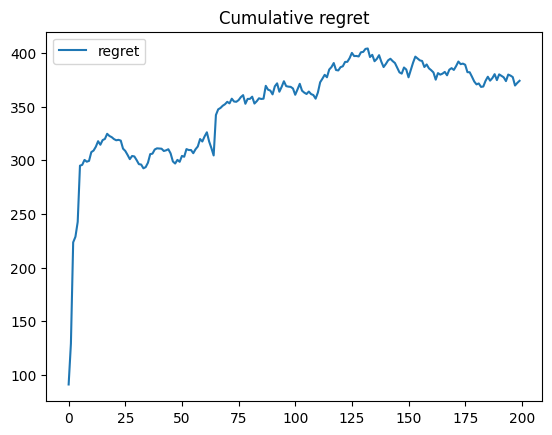

In [13]:
cum_clair_reward=np.cumsum(clair_reward)
cum_reward=np.cumsum(rewards)
plt.plot(cum_clair_reward-cum_reward,label='regret')
plt.title('Cumulative regret')
plt.legend()

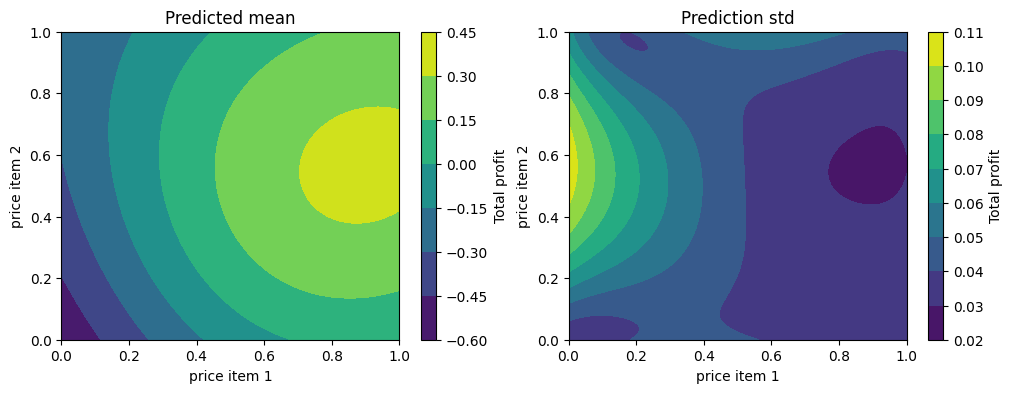

In [14]:
preds=agent.get_predictions()
#predicted_profit=agent.get_predictions()
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(121)
ax.set_title('Predicted mean')
cp=ax.contourf(X,Y,preds[0])
plt.colorbar(cp,label='Total profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')
ax=fig.add_subplot(122)
ax.set_title('Prediction std')
cp=ax.contourf(X,Y,preds[1])
plt.colorbar(cp,label='Total profit')
plt.xlabel('price item 1')
plt.ylabel('price item 2')
plt.show()

In [15]:
args=np.unravel_index(np.argmax(preds[0]),preds[0].shape)
xmax=x[args[1]]
ymax=x[args[0]]
print(f'''Best:         price p1: {best_p1.round(2)}    price p2: {best_p2.round(2)}    profit: {f(best_p1,best_p2,c1,c2,0).round(2)}
Predicted:    price p1: {xmax.round(2)}    price p2: {ymax.round(2)}    profit: {np.max(preds[0]).round(2)}''')

Best:         price p1: 0.9    price p2: 0.54    profit: 0.34
Predicted:    price p1: 0.9    price p2: 0.57    profit: 0.34
